In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import geopandas as gpd

# load raw Google search data (crawl)

In [3]:
# load US state info

# TODO: what is this
map_projection = "epsg:2163"
# state shape
state_shape =  "../bokeh_map/shapefiles/state/tl_2017_us_state.shx"
state_map = gpd.read_file(state_shape)
state_map


,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"MULTIPOLYGON (((-82.98748 24.62538, -82.98748 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677997539,1323452846,+41.5974187,-071.5272723,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ..."
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214048160737,2393355752,+44.3484222,-114.5588538,"POLYGON ((-116.89971 44.84061, -116.89967 44.8..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23187445452,1028643155,+43.6726907,-071.5843145,"POLYGON ((-72.32990 43.60021, -72.32984 43.600..."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125919712692,13470113896,+35.5397100,-079.1308636,"POLYGON ((-82.41674 36.07283, -82.41660 36.073..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23873457570,1031134839,+44.0604795,-072.6733274,"POLYGON ((-73.31328 44.26413, -73.31274 44.265..."


In [4]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)

In [5]:
trend_data2 = {}
for idx, state in enumerate(state_map.STUSPS.values):
    try:
        pytrends.build_payload(kw_list=['RSV'], 
                           timeframe=['2018-02-04 2023-01-30',],
                           geo=f'US-{state}')
        pd = pytrends.interest_over_time()
        trend_data2[state] = pd
        print (f'finish {idx}-{state}')
    except:
        print (f'miss {idx}-{state}')

finish 0-WV
finish 1-FL
finish 2-IL
finish 3-MN
finish 4-MD
finish 5-RI
finish 6-ID
finish 7-NH
finish 8-NC
finish 9-VT
finish 10-CT
finish 11-DE
finish 12-NM
finish 13-CA
finish 14-NJ
finish 15-WI
finish 16-OR
finish 17-NE
finish 18-PA
finish 19-WA
finish 20-LA
finish 21-GA
finish 22-AL
finish 23-UT
finish 24-OH
finish 25-TX
finish 26-CO
finish 27-SC
finish 28-OK
finish 29-TN
finish 30-WY
finish 31-HI
finish 32-ND
finish 33-KY
miss 34-VI
miss 35-MP
miss 36-GU
finish 37-ME
finish 38-NY
finish 39-NV
finish 40-AK
miss 41-AS
finish 42-MI
finish 43-AR
finish 44-MS
finish 45-MO
finish 46-MT
finish 47-KS
finish 48-IN
miss 49-PR
finish 50-SD
finish 51-MA
finish 52-VA
finish 53-DC
finish 54-IA
finish 55-AZ


In [6]:
import pickle
pickle.dump(trend_data2, open("../data/Google_RSV_trend_data.pkl", "wb"))

## use the google data

In [7]:
state_list = []
state_data = []
weeks = trend_data2["IL"].index.tolist()
for key, df in trend_data2.items():
    state_list.append(key)
    state_data.append(df.RSV.tolist())

state_data = np.array(state_data)

## NTF module

In [8]:
def optimize(A, B, D, reg=1e-6):
    u = np.linalg.solve(A + reg * D, B)
    return u

def initialize(T, R, device):
    return *[np.random.random((I, R)) for I in T.shape], np.eye(R)

def NTF_2d(T, A1, A2, D, iteration=200, reg=1e-3, verbose=True):
    interval = iteration // 10
    for i in range(iteration):
        A1 = optimize((A2.T@A2), np.einsum('ij,jr->ri',T,A2, optimize=True), D).T
        A1 = np.clip(A1, a_min=1e-8, a_max=200)
        A1 -= A1.max(1)[0].reshape(-1, 1) * reg * (A1 == np.abs(A1)) * np.ones_like(A1)
        A1 = np.clip(A1, a_min=1e-8, a_max=200)
        
        A2 = optimize((A1.T@A1), np.einsum('ij,ir->rj',T,A1, optimize=True), D).T
        A2 = np.clip(A2, a_min=1e-8, a_max=200)
            
        if verbose:
            if i % interval == interval - 1:
                rec = np.einsum('ir,jr->ij',A1,A2, optimize=True)
                loss = (np.linalg.norm(rec - T) / np.linalg.norm(T))**2
                print ('{}/{}'.format(i, iteration), 'fitness loss:', loss.item())
        
        scale1 = (A1**2).sum(0) ** 0.5
        scale2 = (A2**2).sum(0) ** 0.5
        scale = (scale1 * scale2) ** (1/2)

        A1 = A1 / scale1.reshape(1, -1) * scale.reshape(1, -1)
        A2 = A2 / scale2.reshape(1, -1) * scale.reshape(1, -1)
            
    result = [A1, A2]
    return result

## apply the decomposition

In [14]:
np.random.seed(800)
R = 3
result = NTF_2d(state_data, *initialize(state_data, R=R, device='cpu'), reg=1e-1, iteration=100)

9/100 fitness loss: 0.07761517227745729
19/100 fitness loss: 0.07824519428454423
29/100 fitness loss: 0.07842147658734534
39/100 fitness loss: 0.07844720281594111
49/100 fitness loss: 0.07845053826786307
59/100 fitness loss: 0.0784509617009956
69/100 fitness loss: 0.07845101517093765
79/100 fitness loss: 0.07845102191195694
89/100 fitness loss: 0.07845102276133964
99/100 fitness loss: 0.07845102286834323


In [15]:
# just change the color order
result[1] = result[1][:, [2, 1, 0]]

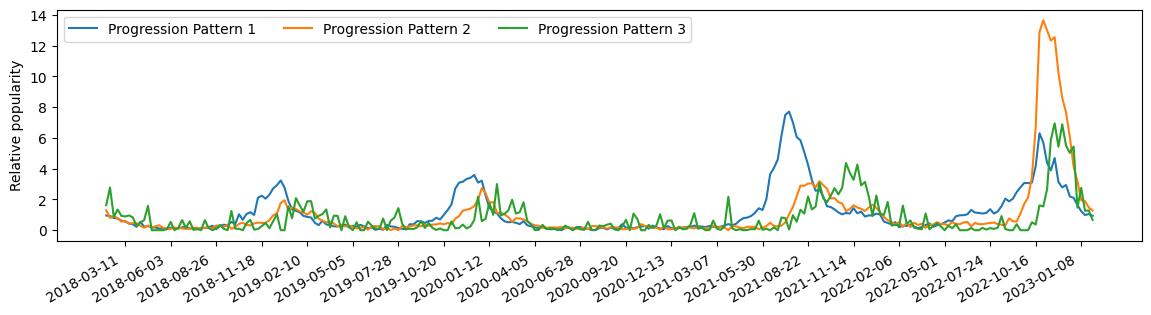

In [16]:
plt.figure(figsize=(14, 3))
for i in range(3):
    plt.plot(result[1][:, i], label=f"Progression Pattern {i+1}")
plt.xticks(np.arange(len(weeks))[5::12], [str(item)[:-8] for item in weeks[5::12]], rotation=30, fontsize=10, ha="right")
plt.ylabel("Relative popularity")
plt.legend(ncols=3)

([<matplotlib.axis.YTick at 0x7fdf99d6d400>,
 [Text(0, 0, 'pattern 1'), Text(0, 1, 'pattern 2'), Text(0, 2, 'pattern 3')])

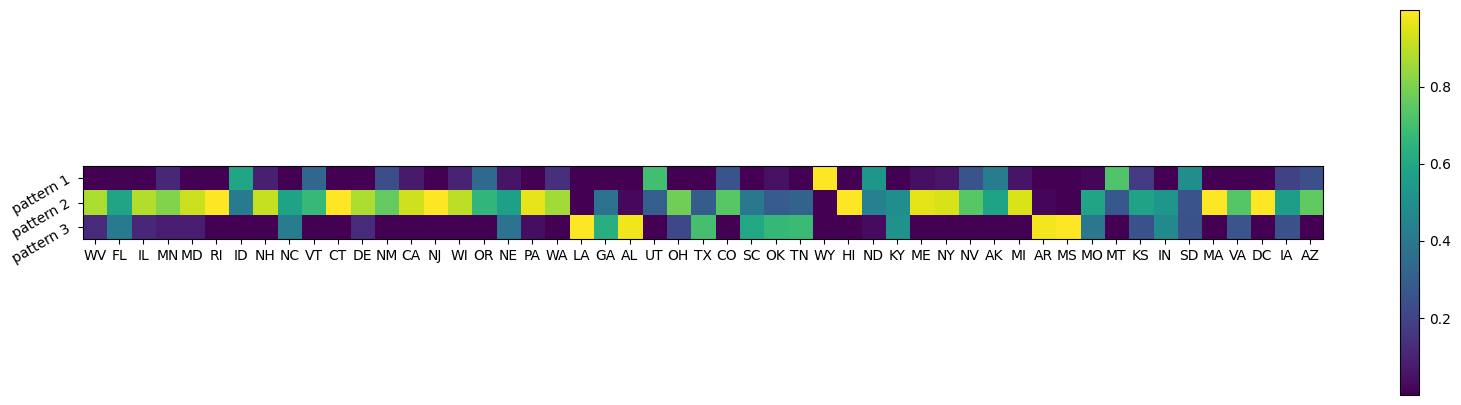

In [17]:
result[0] = result[0] / result[0].sum(1).reshape(-1, 1)
plt.figure(figsize=(20, 5))
plt.imshow(result[0].T)
plt.colorbar()
plt.xticks(np.arange(len(state_list)), state_list)
plt.yticks([0,1,2], ["pattern 1", "pattern 2", "pattern 3"], rotation=30, fontsize=10, ha="right")

In [18]:
# dump
import pickle

pickle.dump(result[0], open("../data/google_state_representation.pkl", "wb"))
pickle.dump(state_list, open("../data/google_state_list.pkl", "wb"))